In [2]:
import os
from email.parser import Parser
import email.utils
import time
import datetime
from dateutil.parser import parse

user_sent_items = {}
user_deleted_items = {}
user_inbox_items= {}

print('hello')

path = 'C:/Users/Dhaval/Python_Data/bhinde_dhaval_spring2017/midterm/data/enron/maildir'
for filename in os.listdir(path):
    for x in os.listdir(path+'/'+filename):
        if (x=='_sent_mail')or(x=='sent_items')or(x=='sent'):
                ab_path=path+'/'+filename+'/'+x
                count_sent = len([name for name in os.listdir(ab_path) if os.path.isfile(os.path.join(ab_path, name))])
                if filename not in user_sent_items:  
                        user_sent_items[filename] = count_sent
                else: user_sent_items[filename]+=count_sent
        elif (x=='deleted_items'):
            ab_path=path+'/'+filename+'/'+x
            count_deleted = len([name for name in os.listdir(ab_path) if os.path.isfile(os.path.join(ab_path, name))])
            if filename not in user_deleted_items:  
                user_deleted_items[filename] = count_deleted
            else: user_deleted_items[filename]+=count_deleted            
        elif (x=='inbox')or(x=='notes_inbox'):
            ab_path=path+'/'+filename+'/'+x
            count_inbox = len([name for name in os.listdir(ab_path) if os.path.isfile(os.path.join(ab_path, name))])
            if filename not in user_inbox_items:  
                user_inbox_items[filename] = count_inbox
            else: user_inbox_items[filename]+=count_inbox            

print('Execution Complete!')                

hello
Execution Complete!


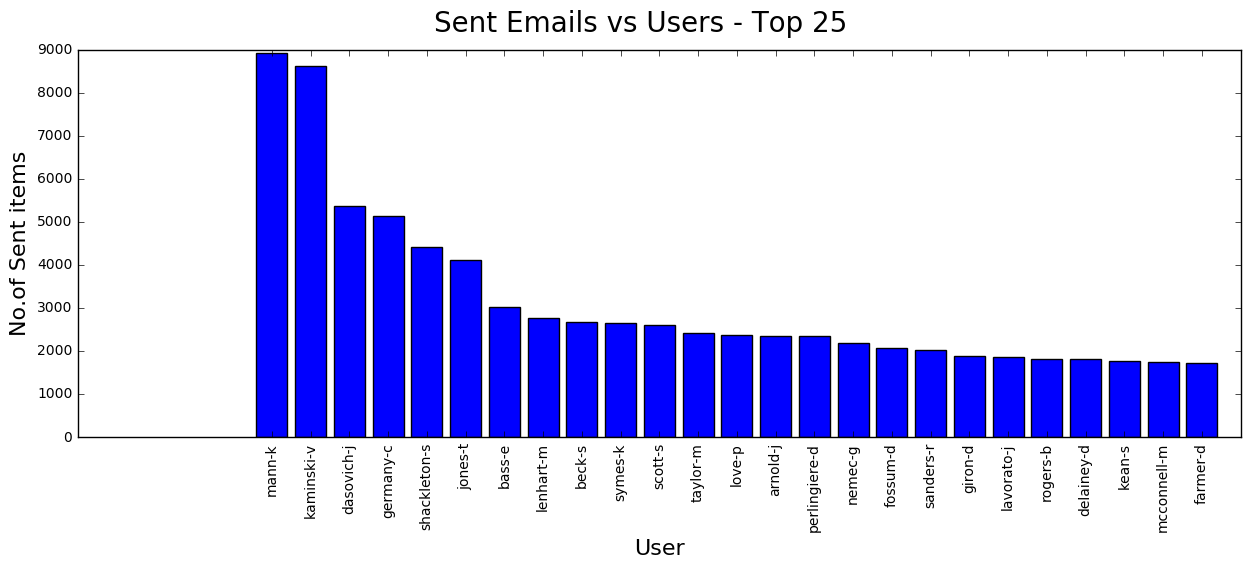

In [16]:
# Get top 25 people with maximum no.of sent emails
import matplotlib.pyplot as plt

v1 = [v[1] for v in sorted(user_sent_items.items(), key=lambda x:x[1],reverse=True)[:25]]
v2 = [v[0] for v in sorted(user_sent_items.items(), key=lambda x:x[1],reverse=True)[:25]]

# Top 50 Users
t50_sent = [v[0] for v in sorted(user_sent_items.items(), key=lambda x:x[1],reverse=True)[:50]]


from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Sent Emails vs Users - Top 25', fontsize=20)
plt.xlabel('User', fontsize=16)
plt.ylabel('No.of Sent items', fontsize=16)
plt.bar(range(len(v1)), v1, align='center')
plt.xticks(range(len(v2)), v2,rotation='vertical')

plt.show()

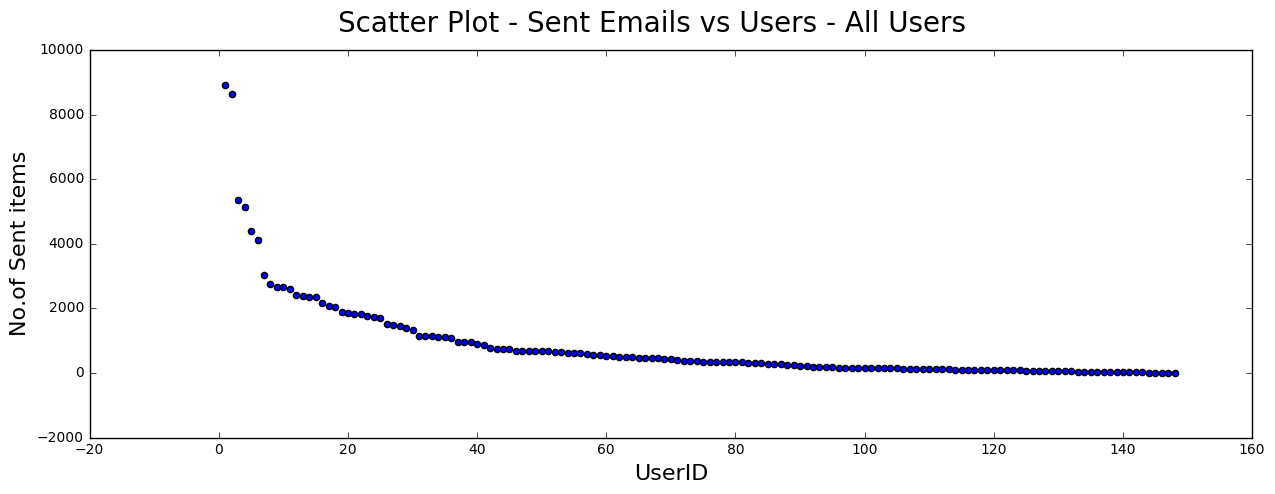

In [17]:
import matplotlib.pyplot as plt
import pylab

uid = list(range(1,149))

v1 = [v[1] for v in sorted(user_sent_items.items(), key=lambda x:x[1],reverse=True)]

fig = plt.figure()
fig.suptitle('Scatter Plot - Sent Emails vs Users - All Users', fontsize=20)
plt.xlabel('UserID', fontsize=16)
plt.ylabel('No.of Sent items', fontsize=16)
plt.scatter(uid,v1)
plt.show()


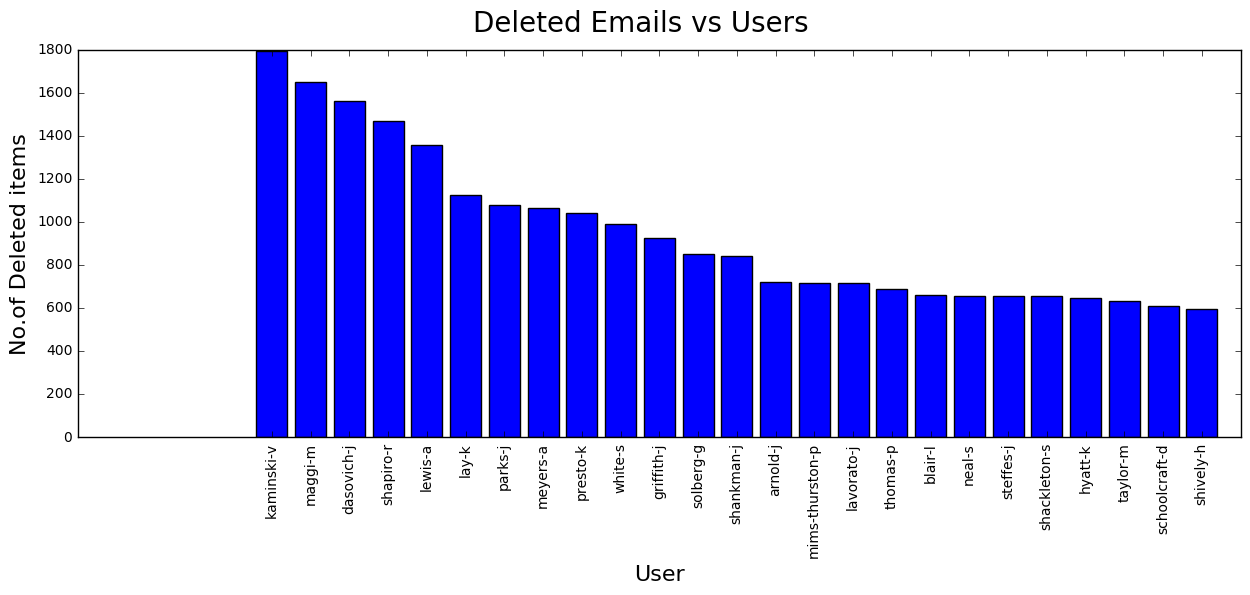

In [8]:
# Get top 25 people with maximum no.of deleted emails
import matplotlib.pyplot as plt

d1 = [v[1] for v in sorted(user_deleted_items.items(), key=lambda x:x[1],reverse=True)[:25]]
d2 = [v[0] for v in sorted(user_deleted_items.items(), key=lambda x:x[1],reverse=True)[:25]]

# Top 50 Users
t50_delete = [v[0] for v in sorted(user_deleted_items.items(), key=lambda x:x[1],reverse=True)[:50]]

from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Deleted Emails vs Users', fontsize=20)
plt.xlabel('User', fontsize=16)
plt.ylabel('No.of Deleted items', fontsize=16)
plt.bar(range(len(d1)), d1, align='center')
plt.xticks(range(len(d2)), d2,rotation='vertical')

plt.show()

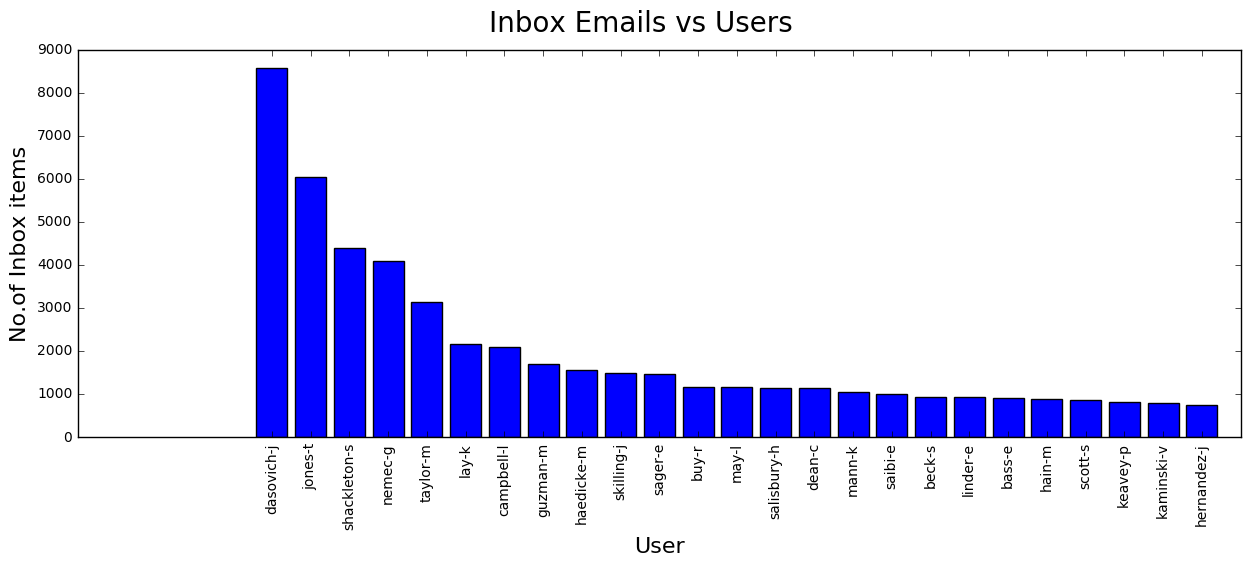

In [9]:
# Get top 25 people with maximum no.of inbox emails
import matplotlib.pyplot as plt

i1 = [v[1] for v in sorted(user_inbox_items.items(), key=lambda x:x[1],reverse=True)[:25]]
i2 = [v[0] for v in sorted(user_inbox_items.items(), key=lambda x:x[1],reverse=True)[:25]]

# Top 50 Users
t50_inbox = [v[0] for v in sorted(user_inbox_items.items(), key=lambda x:x[1],reverse=True)[:50]]


from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

fig = plt.figure()
fig.suptitle('Inbox Emails vs Users', fontsize=20)
plt.xlabel('User', fontsize=16)
plt.ylabel('No.of Inbox items', fontsize=16)
plt.bar(range(len(i1)), i1, align='center')
plt.xticks(range(len(i2)), i2,rotation='vertical')

plt.show()

In [17]:
# Checking for overlapping users 2 categories (Highest Inbox and Deleted items)
thelist = set(t50_inbox).intersection(t50_delete)
print('The users with highest overlapping activity are:',thelist)
thefile = open('HighActivity_Users.txt', 'w')

for item in thelist:
    thefile.write("%s\n" % item)


The users with highest overlapping activity are: {'dasovich-j', 'skilling-j', 'shackleton-s', 'watson-k', 'taylor-m', 'cash-m', 'parks-j', 'hodge-j', 'giron-d', 'scott-s', 'steffes-j', 'sanders-r', 'bass-e', 'lay-k', 'kaminski-v', 'thomas-p'}
